# Demonstração gráfica entre os dados das máquinas e seus dados de funcionamento versus os tipos de falhas apresentados. Fora descartada a apresentação das falhas randômicas por serem, justamente, randômicas (com 0.1% de ocorrência).

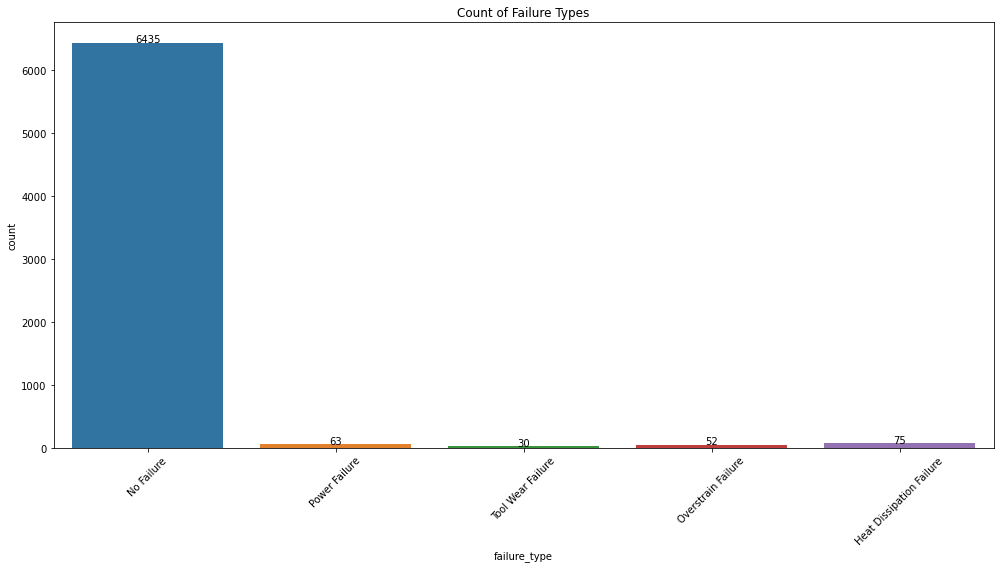

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
df = df[df.failure_type != "Random Failures"]

plt.figure(figsize=(14,8))
ax = sns.countplot(x="failure_type", data=df)
plt.title("Count of Failure Types")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, height, ha="center")
plt.tight_layout()

Figura 1. Gráfico em formato de barra indicando a quantidade de registros para cada tipo de falha

<Figure size 1440x576 with 0 Axes>

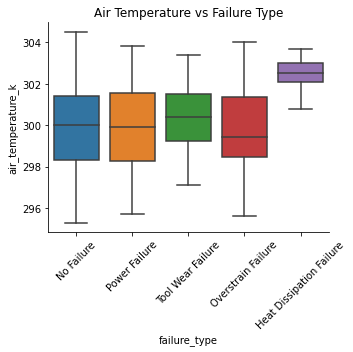

In [2]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="air_temperature_k", kind="box", data=df)
plt.title("Air Temperature vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()



Figura 2. Gráfico de caixa apresentando a relação entre a temperatura do ar e os tipos de falhas.

<Figure size 1440x576 with 0 Axes>

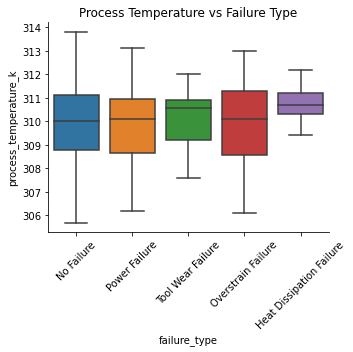

In [3]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="process_temperature_k", kind="box", data=df)
plt.title("Process Temperature vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Fig 3. Gráfico de caixa apresentando a relação entre a temperatura do processo e os tipos de falhas.

<Figure size 1440x576 with 0 Axes>

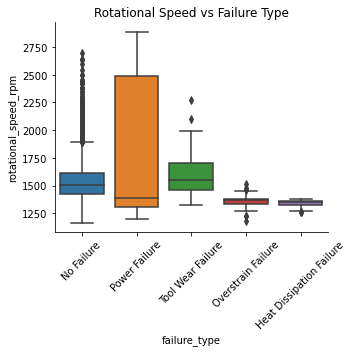

In [4]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="rotational_speed_rpm", kind="box", data=df)
plt.title("Rotational Speed vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 4. Gráfico de caixa apresentando a relação entre a velocidade rotacional em RPM e os tipos de falha

<Figure size 1440x576 with 0 Axes>

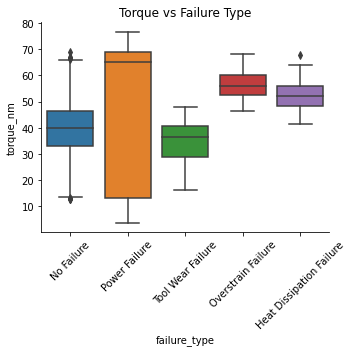

In [5]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="torque_nm", kind="box", data=df)
plt.title("Torque vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()



Figura 5. Gráfico de caixa apresentando a relação entre o torque e os tipos de falhas.

<Figure size 1440x576 with 0 Axes>

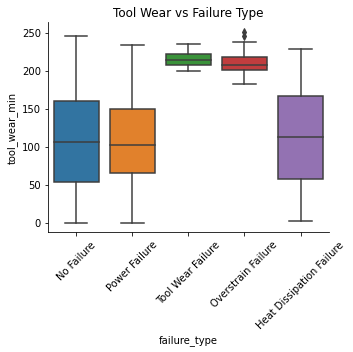

In [6]:
plt.figure(figsize=(20,8))
sns.catplot(x="failure_type", y="tool_wear_min", kind="box", data=df)
plt.title("Tool Wear vs Failure Type")
plt.xticks(rotation=45)
plt.tight_layout()


Figura 6. Gráfico de caixa apresentando a relação entre o desgaste do equipamento e os tipos de falhas.

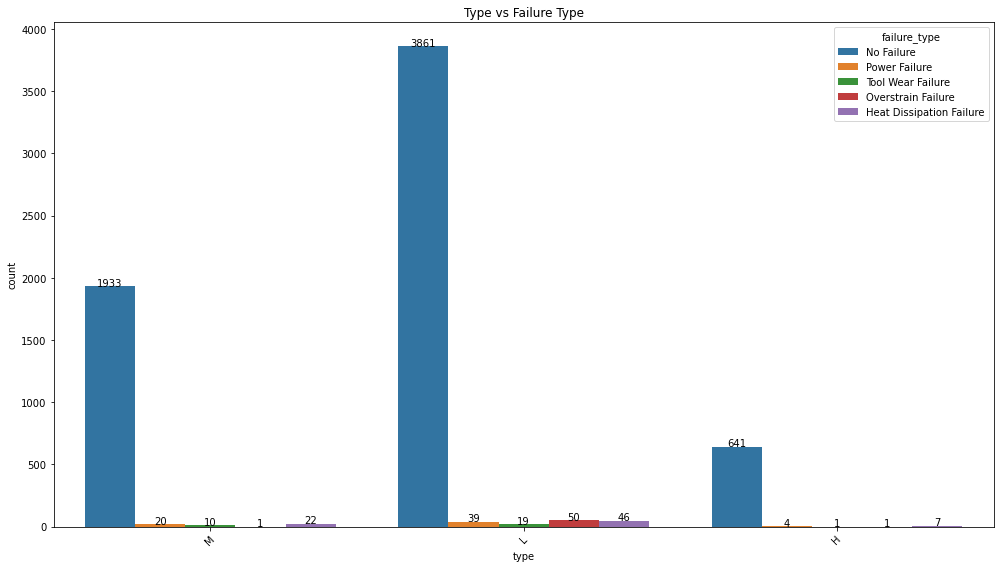

In [7]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="type", hue="failure_type", data=df)
plt.title("Type vs Failure Type")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, height, ha="center")
plt.tight_layout()


Figura número 7. Gráfico de barras apresentando a relação entre os três níveis de qualidade do produto e os tipos de falhas.

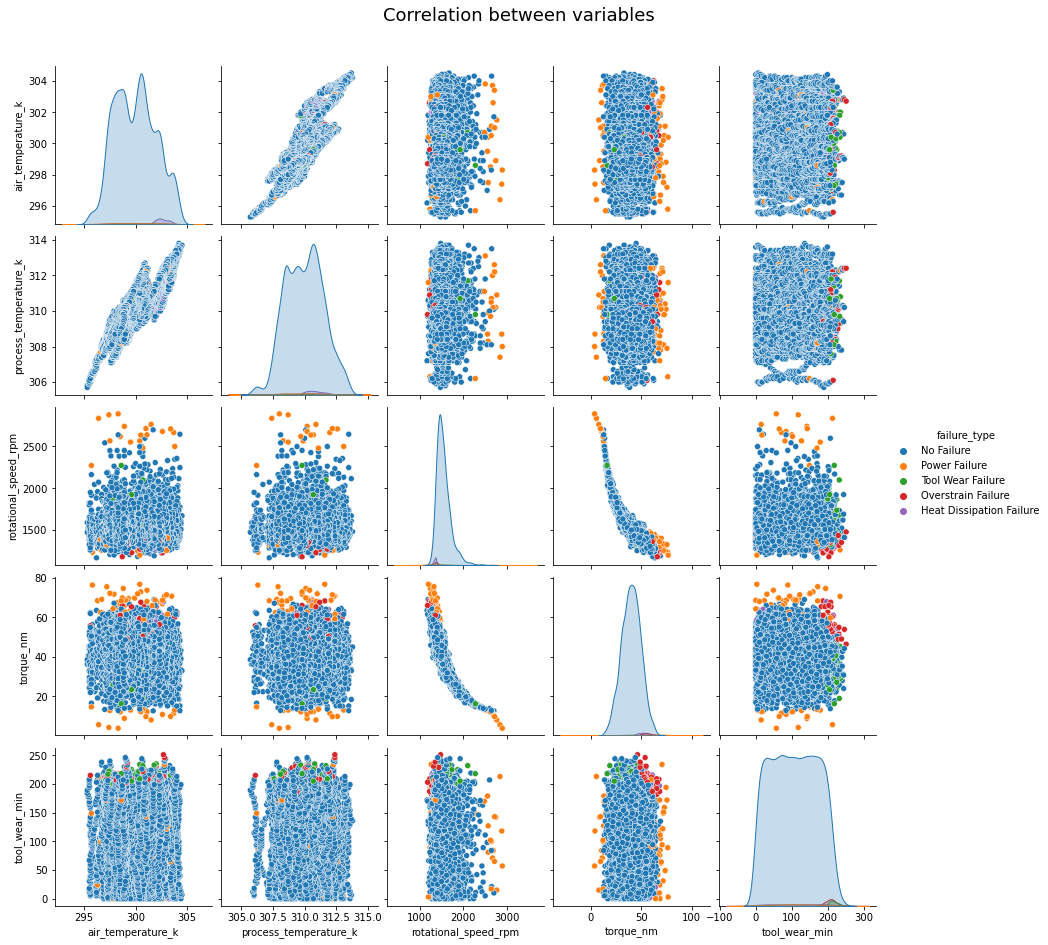

In [8]:
sns.pairplot(df, vars=['air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min'], hue='failure_type')
plt.suptitle("Correlation between variables", y=1.05, fontsize=18)

plt.show()


Figura 8. Apresenta uma matriz apresentando correlação entre as variáveis.

In [9]:
df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
failure_count = df['failure_type'].value_counts()
failure_percent = (failure_count/df.shape[0]) * 100
print("Percentual dos tipos de falhas: \n", failure_percent)

Percentual dos tipos de falhas: 
 No Failure                  96.520174
Heat Dissipation Failure     1.124944
Power Failure                0.944953
Overstrain Failure           0.779961
Tool Wear Failure            0.449978
Random Failures              0.179991
Name: failure_type, dtype: float64


Temos então, os percentuais que representam os tipos de falhas dos dados de treino.
Apresenta se um total de aproximadamente 96.5% de máquinas que não apresentaram falhas e um total de aproximadamente 3.5% que apresentou algum tipo de falha.

# A partir deste ponto, tendo adicionado ao arquivo "desafio_manutencao_preditiva_teste.csv" a coluna "failure_type" proveniente da previsão de falhas do código "Pre_Processamento e ML", se tem a comparação estatística dos dados. 


In [10]:
df = pd.read_csv("desafio_manutencao_preditiva_teste.csv")
failure_count = df['failure_type'].value_counts()
failure_percent = (failure_count/df.shape[0]) * 100
print("Percentual dos tipos de falhas: \n", failure_percent)

Percentual dos tipos de falhas: 
 No Failure                  97.539754
Power Failure                0.930093
Heat Dissipation Failure     0.840084
Overstrain Failure           0.570057
Tool Wear Failure            0.120012
Name: failure_type, dtype: float64


Acima os percentuais que representam os tipos de falhas resultantes da previsão.
Apresenta se um total de aproximadamente 97.5% de máquinas que não apresentaram falhas e um total de aproximadamente 2.5% que apresentou algum tipo de falha. 

In [11]:
df1 = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
df2 = pd.read_csv("desafio_manutencao_preditiva_teste.csv")


failure_count1 = df1['failure_type'].value_counts()
failure_count2 = df2['failure_type'].value_counts()


total_failure_count = failure_count1 + failure_count2

percent_diff = (failure_count2 - failure_count1) / total_failure_count * 100


difference = (failure_count1 - failure_count2) / failure_count1 * 100
print("Percentage Differences between the first and second CSV files for each failure type: \n", difference, "%")

Percentage Differences between the first and second CSV files for each failure type: 
 Heat Dissipation Failure    62.666667
No Failure                  49.479409
Overstrain Failure          63.461538
Power Failure               50.793651
Random Failures                   NaN
Tool Wear Failure           86.666667
Name: failure_type, dtype: float64 %


Acima, foi calculado a diferença percentual da ocorrência de falhas entre o arquivo de treino e de teste. Temos como resultado, um aumento considerável da ocorrência de falhas.

In [12]:
import scipy.stats as stats
import pandas as pd

df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
df['failure_type'] = df['failure_type'].astype("category")
df['type'] = df['type'].astype("category")

grouped = df.groupby("type")["failure_type"]
f_value, p_value = stats.f_oneway(*[grouped.get_group(name).cat.codes for name in grouped.groups])

print("F-value:", f_value)
print("p-value:", p_value)


F-value: 1.1555810639565562
p-value: 0.31493760945976373


Acima, há o resultado do cálculo para considerar se há relevância do tipo da máquina (H,L ou M) no evento de falhas. De acordo com o valor p, que é apresentado como 0.31 ou 31%, e levando em consideração que o valor de probilidade relevante deve ser igual ou menor que 0.05 ou 5%, se tem a presunção que o tipo da máquina não influencia significativamente no acontecimento de falhas.